In [1]:
import pandas as pd 
import os 

csv_path = '/legodata/zhaoj/cvd_risk_time2/src/ML/csv' 

model = 'lr'
name = '' 
folder = 'bench_7'

folder = 'bench_7'

In [2]:
# from sklearn.metrics import roc_auc_score
# for file in os.listdir(os.path.join(csv_path, 'bench_5')):
#     if 'pred' in file and 'gbt' in file and 'fram' in file:
#         df_pred = pd.read_csv(os.path.join(csv_path, 'bench_5', file))
#         print(file, '\t', roc_auc_score(df_pred['CLASS'], df_pred['SCORE']), '\t', len(df_pred.loc[df_pred['PRED'] == 1]))

In [3]:
df_fram_pred = pd.read_csv(os.path.join(csv_path, folder, '{}_pred_{}{}.csv'.format(model, 'fram', name)))
df_fram_feat = pd.read_csv(os.path.join(csv_path, folder, '{}_feat_{}{}.csv'.format(model, 'fram', name)))

df_full_pred = pd.read_csv(os.path.join(csv_path, folder, '{}_pred_{}{}.csv'.format(model, 'full', name)))
df_full_feat = pd.read_csv(os.path.join(csv_path, folder, '{}_feat_{}{}.csv'.format(model, 'full', name)))

df_true_fram_pred = pd.read_csv(os.path.join(csv_path, folder, '{}_pred_{}{}.csv'.format(model, 'true_fram', name)))
df_true_fram_feat = pd.read_csv(os.path.join(csv_path, folder, '{}_feat_{}{}.csv'.format(model, 'true_fram', name)))

# print('# of predictions:\t{}'.format(len(df_pred)))
# print('# of features:\t\t{}'.format(len(df_feat)))
# print('# of pos pred:\t{}'.format(len(df_pred.loc[df_pred['PRED'] == 1])))

# if model == 'rf': 
#     df_pred['SCORE'] = df_pred['PROB(1)']

In [80]:
# df_pred_fram = df_pred.loc[df_pred['predict'] == 0]
# df_pred_fram.head()

In [9]:
df_full_pred.head()

,GRID,PRED,PROB(0),PROB(1),CLASS,SCORE,FOLD
0,R200000399,1,0.425182,0.574818,0,0.301535,0
1,R200001457,0,0.579957,0.420043,1,-0.322596,0
2,R200003102,1,0.299399,0.700601,1,0.850160,0
3,R200003682,0,0.668883,0.331117,1,-0.703139,0
4,R200007283,0,0.652203,0.347797,0,-0.628739,0


In [10]:
print(len(df_full_pred.loc[(df_full_pred['CLASS'] == 1)]))

18962


In [81]:
from sklearn.metrics import roc_auc_score, classification_report

print(classification_report(df_full_pred['CLASS'], df_full_pred['PRED'])[1])

print('FRAM') 
print(classification_report(df_fram_pred['CLASS'], df_fram_pred['PRED']))
print('TRUE FRAM') 
print(classification_report(df_true_fram_pred['CLASS'], df_true_fram_pred['PRED']))
print('FULL')
print(classification_report(df_full_pred['CLASS'], df_full_pred['PRED']))

# print(classification_report(df_pred_fram['CLASS'], df_pred_fram['PRED']))

 
FRAM
             precision    recall  f1-score   support

          0       0.92      0.76      0.84     82976
          1       0.21      0.50      0.29     10372

avg / total       0.84      0.73      0.77     93348

TRUE FRAM
             precision    recall  f1-score   support

          0       0.93      0.76      0.84     53512
          1       0.23      0.57      0.33      6689

avg / total       0.86      0.74      0.78     60201

FULL
             precision    recall  f1-score   support

          0       0.93      0.74      0.82    151696
          1       0.22      0.58      0.31     18962

avg / total       0.85      0.72      0.77    170658



In [82]:
print('FRAM:\t\t{}'.format(roc_auc_score(df_fram_pred['CLASS'], df_fram_pred['SCORE'])))
print('TRUE FRAM:\t{}'.format(roc_auc_score(df_true_fram_pred['CLASS'], df_true_fram_pred['SCORE'])))
print('FULL:\t\t{}'.format(roc_auc_score(df_full_pred['CLASS'], df_full_pred['SCORE'])))

# print(roc_auc_score(df_pred_fram['CLASS'], df_pred_fram['SCORE']))

FRAM:		0.6804217564747952
TRUE FRAM:	0.7021741187242501
FULL:		0.7025559480212012


In [76]:
# from sklearn.metrics import roc_curve
# fpr, tpr, tresh = roc_curve(df_pred['CLASS'], df_pred['SCORE']) 
# # fpr_fram, tpr_fram, tresh_fram = roc_curve(df_pred_fram['CLASS'], df_pred_fram['PRED'])

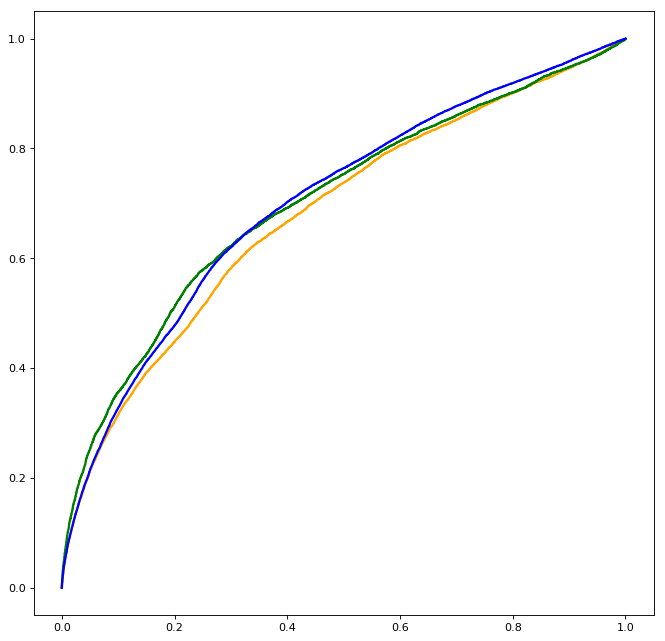

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn.metrics import roc_curve, auc

from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
lw = 2

color = ['blue', 'green', 'orange']
for df_pred in [df_fram_pred, df_true_fram_pred, df_full_pred]:
    n_classes = 2
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(df_pred['CLASS'], df_pred['SCORE'])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # # Compute micro-average ROC curve and ROC area
    # fpr["micro"], tpr["micro"], _ = roc_curve(df_pred['PRED'].ravel(), df_pred['SCORE'].ravel())
    # roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    
    plt.plot(fpr[1], tpr[1], color=color.pop(),  
             lw=lw, label='Fram ROC curve (area = {})'.format(round(roc_auc[1], 3)))


# n_classes = 2
# # Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(df_pred_2['CLASS'], df_pred_2['SCORE'])
#     roc_auc[i] = auc(fpr[i], tpr[i])
    
# plt.plot(fpr[1], tpr[1], color='green', linestyle='--', 
#          lw=lw, label='Full ROC curve (area = {})'.format(round(roc_auc[1], 3)))
    
# plt.plot([0, 1], [0, 1], color='darkblue', lw=lw, linestyle='-.')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
plt.show()

In [51]:
# from sklearn.metrics import precision_recall_curve
# prec, recall, thresh = precision_recall_curve(df_fram_pred['CLASS'], df_fram_pred['SCORE'])
# # prec_fram, recall_fram, thresh_fram = precision_recall_curve(df_pred_fram['CLASS'], df_pred_fram['SCORE'])

# plt.plot(recall, prec) 
# # plt.plot(recall_fram, prec_fram)
# plt.show()

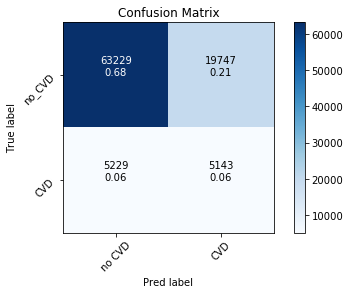

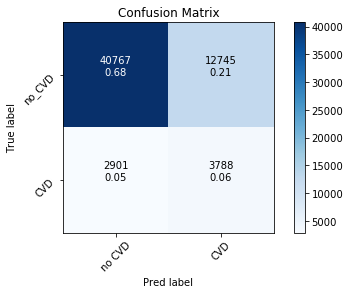

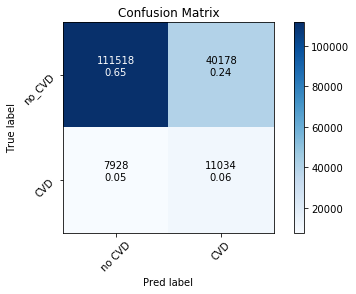

In [52]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

for df_pred in [df_fram_pred, df_true_fram_pred, df_full_pred]: 
    c_matrix = confusion_matrix(df_pred['CLASS'], df_pred['PRED'])
    c_matrix_norm = c_matrix.astype('float') / c_matrix.sum()
    c_matrix_norm

    plt.imshow(c_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix') 
    plt.colorbar()
    tick_marks = np.arange(len(['no CVD', 'CVD']))
    plt.xticks(tick_marks, ['no CVD', 'CVD'], rotation=45)
    plt.yticks(tick_marks, ['no_CVD', 'CVD'], rotation=45)

    fmt = 'd'
    thresh = c_matrix.max() / 4.
    for i, j in itertools.product(range(c_matrix.shape[0]), range(c_matrix.shape[1])):
    #     plt.text(j, i, format(c_matrix[i, j], fmt),
        plt.text(j, i, '{}\n{}'.format(c_matrix[i,j], format(c_matrix_norm[i,j], '.2f')),
                 horizontalalignment="center",
                 color="white" if c_matrix[i, j] == c_matrix.max() else "black")

    plt.tight_layout() 
    plt.ylabel('True label') 
    plt.xlabel('Pred label')

    plt.show()

In [53]:
# c_matrix_fram = confusion_matrix(df_pred_fram['CLASS'], df_pred_fram['PRED'])

# c_matrix = confusion_matrix(df_pred_fram['CLASS'], df_pred_fram['PRED'])
# c_matrix_norm = c_matrix.astype('float') / c_matrix.sum()
# c_matrix_norm

# plt.imshow(c_matrix_fram, interpolation='nearest', cmap=plt.cm.Blues)
# plt.title('Confusion Matrix (fram)') 
# plt.colorbar()
# tick_marks = np.arange(len(['no CVD', 'CVD']))
# plt.xticks(tick_marks, ['no CVD', 'CVD'], rotation=45)
# plt.yticks(tick_marks, ['no_CVD', 'CVD'], rotation=45)
                        
# fmt = 'd'
# fmt_f = '.2f'
# thresh = c_matrix_fram.max() / 3.
# for i, j in itertools.product(range(c_matrix_fram.shape[0]), range(c_matrix_fram.shape[1])):
#     plt.text(j, i, '{}\n{}'.format(c_matrix[i,j], format(c_matrix_norm[i,j], '.2f')),
#              horizontalalignment="center",
#              color='white' if c_matrix_fram[i,j] == c_matrix_fram.max() else 'black')
    
# plt.tight_layout() 
# plt.ylabel('True label') 
# plt.xlabel('Pred label')

# plt.show()

In [54]:
# len(df_pred_fram.loc[(df_pred_fram['CLASS'] == 1) & (df_pred_fram['PRED'] == 0)])

In [55]:
order_lst = ['fram', 'true_fram', 'full'] 
it = 0 

num_feat = 20
df_top_feat = pd.DataFrame({'RANK': list(range(num_feat))})

for df_feat in [df_fram_feat, df_true_fram_feat, df_full_feat]: 
    # df_feat.sort_values(by='WEIGHT0', ascending=True)
    rank_col_lst = [col for col in list(df_feat.columns) if 'WEIGHT' in col]

    rank_col_lst.append('FEATURE')
    df_feat_rank = df_feat[rank_col_lst].set_index('FEATURE')
    # df_feat_rank = pd.concat([df_feat_rank, df_feat_rank.mean(axis=1)], axis=1)
    # df_feat_rank = df_feat_rank.rename(columns={0: 'AVG'})
    df_feat_rank['AVG'] = df_feat_rank.mean(axis=1)

    weight_total = df_feat_rank['AVG'].sum()
    pct_weight_lst = [weight / weight_total * 100 for weight in list(df_feat_rank['AVG'])] 

    # with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    if model == 'lr': 
        feat_lst = abs(df_feat_rank['AVG']).sort_values(ascending=False).index.values
    else: 
        feat_lst = df_feat_rank['AVG'].sort_values(ascending=False).index.values

    df_top_feat[order_lst[it]] = feat_lst[0:num_feat]
    print(df_feat_rank['AVG'].loc[feat_lst[0:num_feat]].sum())
                            
    it += 1

0.668782263423
0.76501416106
0.941828294237


In [56]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(df_top_feat[['fram']].to_string(index=False))
    print(df_top_feat[['true_fram']].to_string(index=False))
    print(df_top_feat[['full']].to_string(index=False))

fram
                             SMOKING
                           med_32968
                     missing_bp_True
                             phe_418
                            med_1191
                           phe_250.2
                           phe_395.2
                          med_221696
                             phe_465
                           med_10579
missing_('Lipase', 'MAX_VALUE')_True
                           phe_427.9
                           phe_401.1
                           phe_350.3
                           phe_395.1
                          med_854930
                           med_19478
                            phe_1010
missing_('TstPBy', 'MAX_VALUE')_True
 missing_('LYMPA', 'MAX_VALUE')_True
true_fram
                             SMOKING
                           med_32968
                          med_221696
                             phe_465
                             phe_418
                     missing_bp_True
                       